In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
#Load Data
df = pd.read_csv("../data/creditcard.csv")

## Exploratory Data Analysis

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


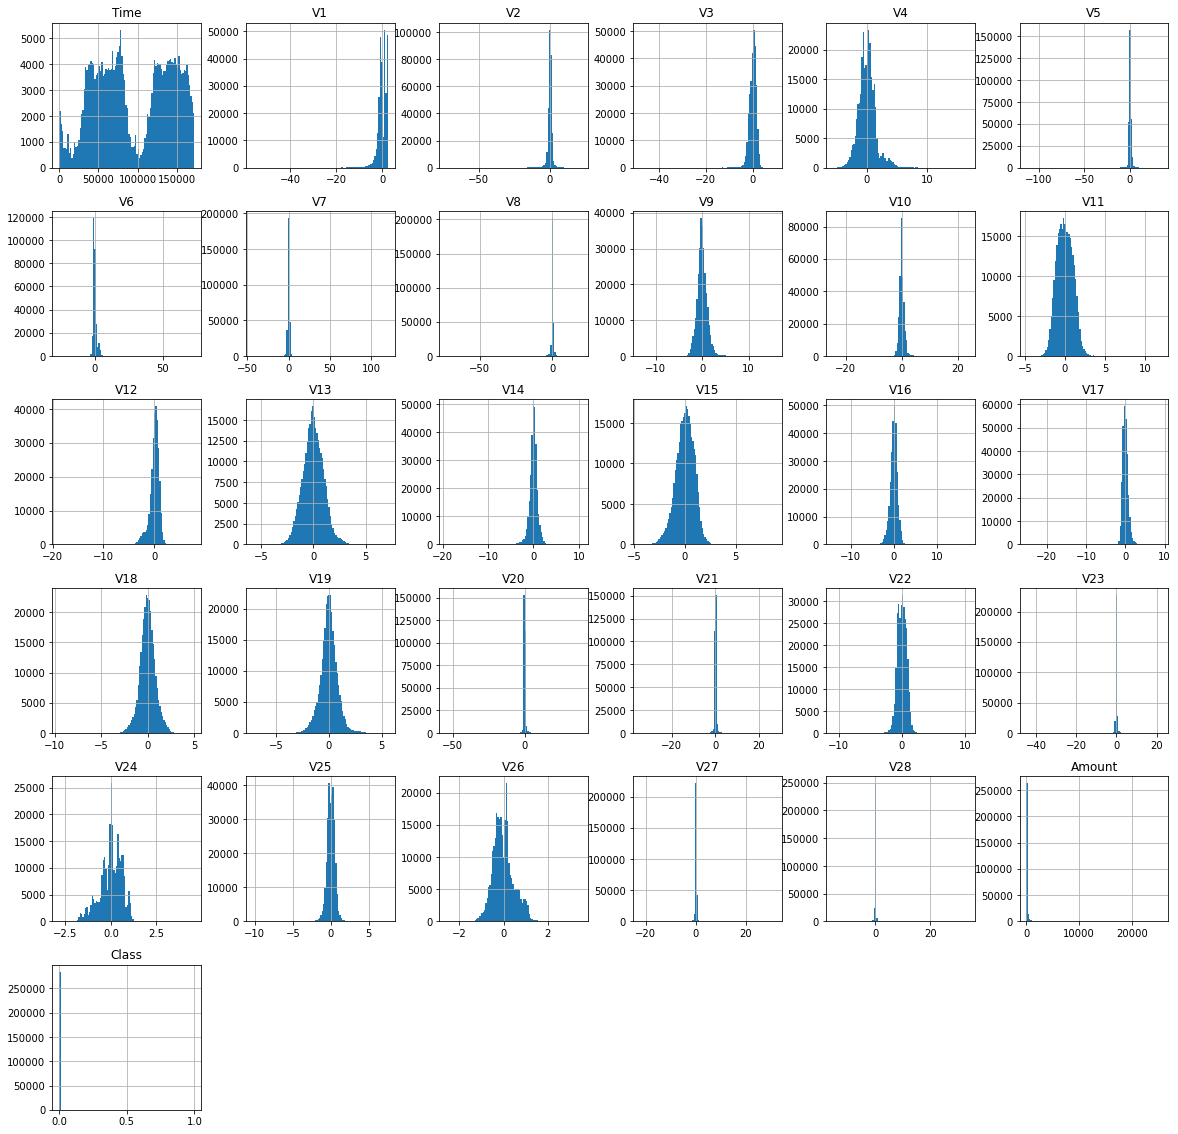

In [4]:
hist = df.hist(bins=100, figsize = (20,20))

<AxesSubplot:>

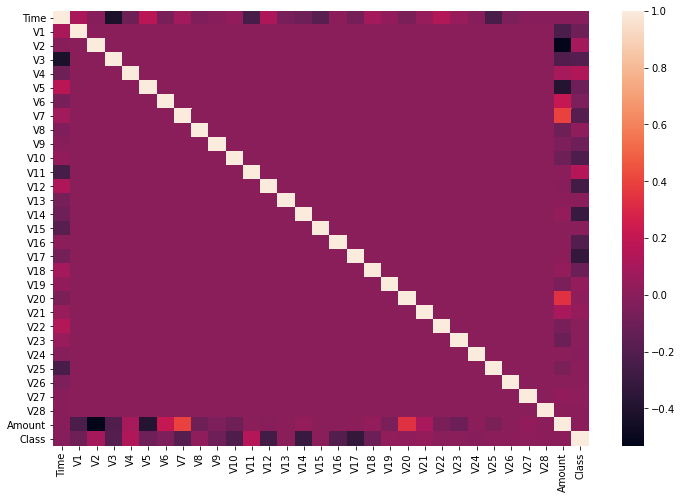

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

## Anomaly Visualization

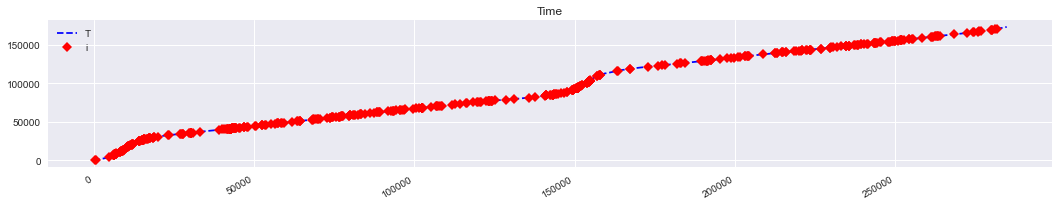

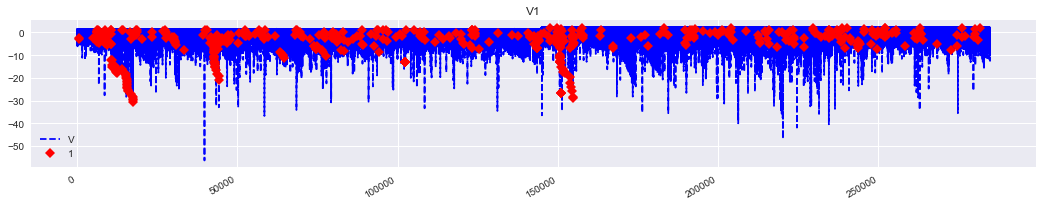

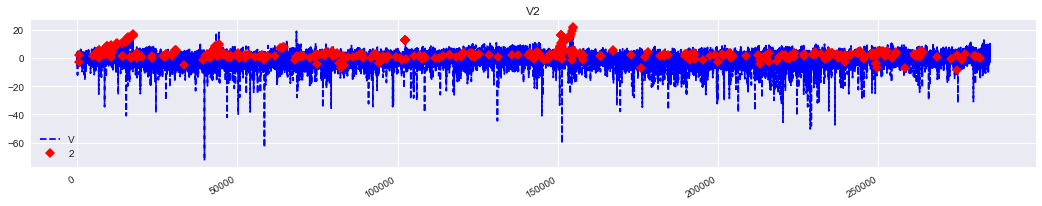

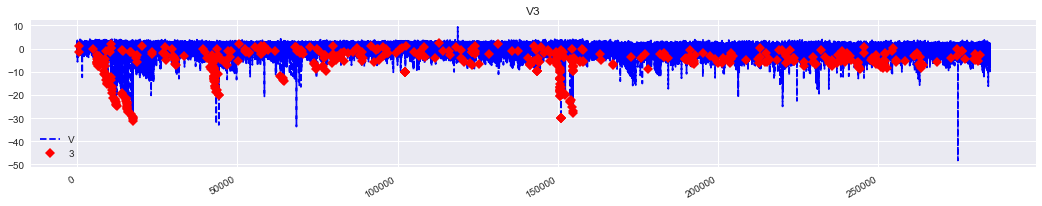

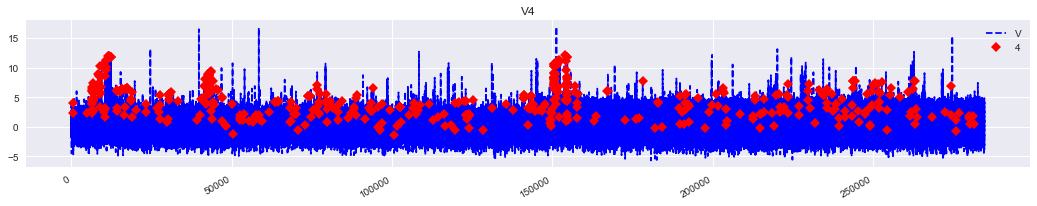

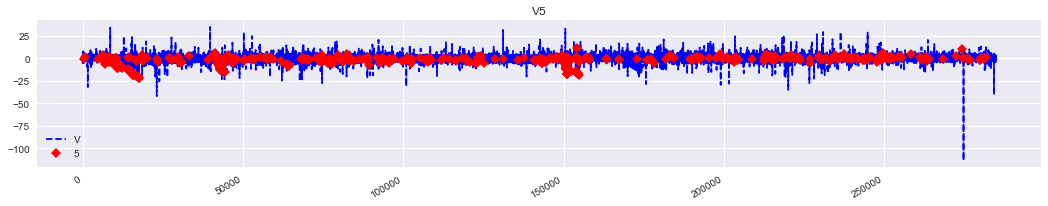

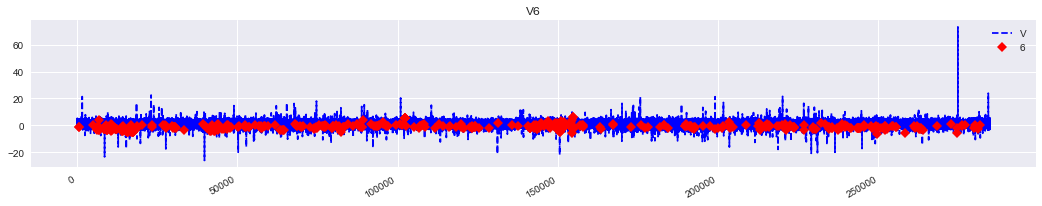

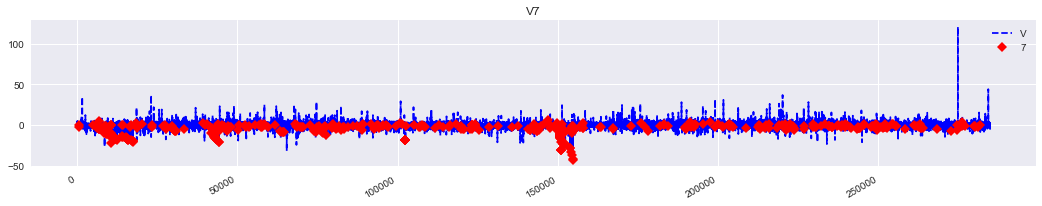

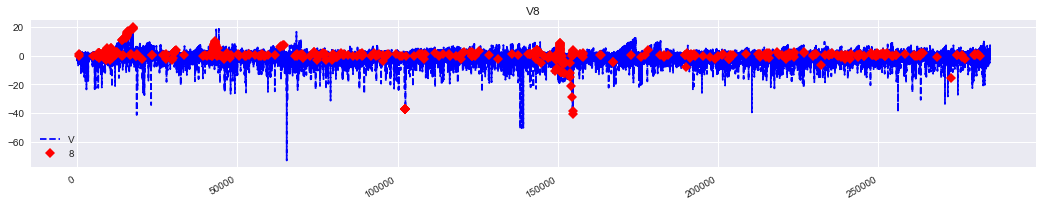

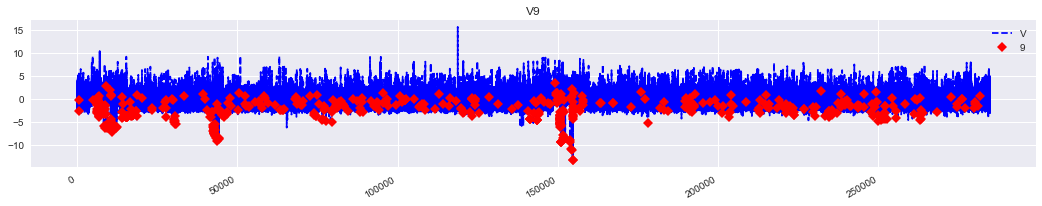

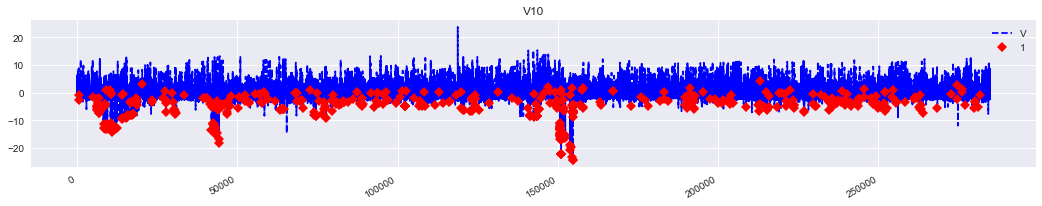

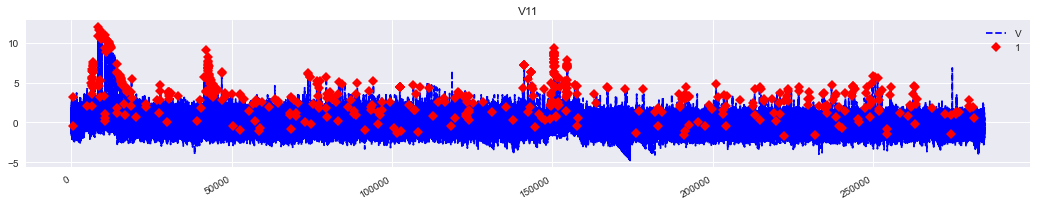

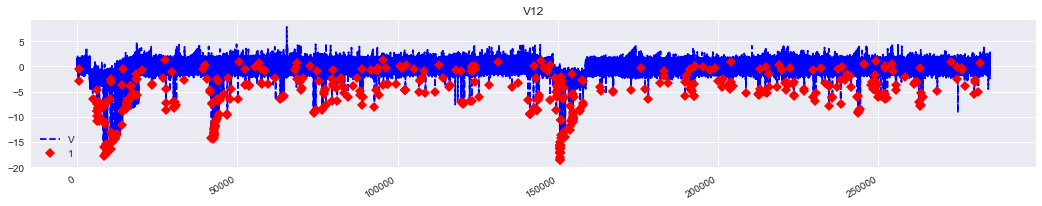

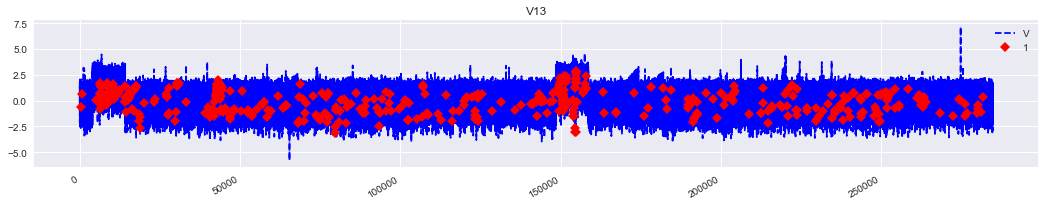

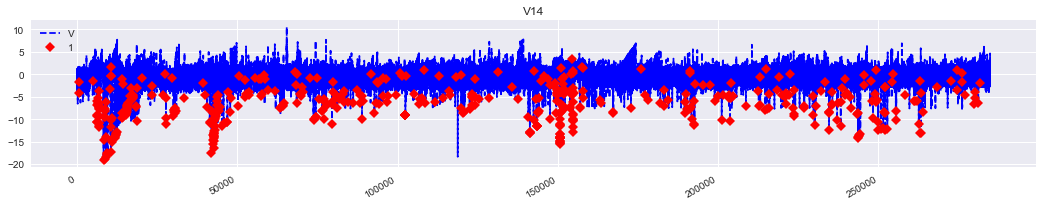

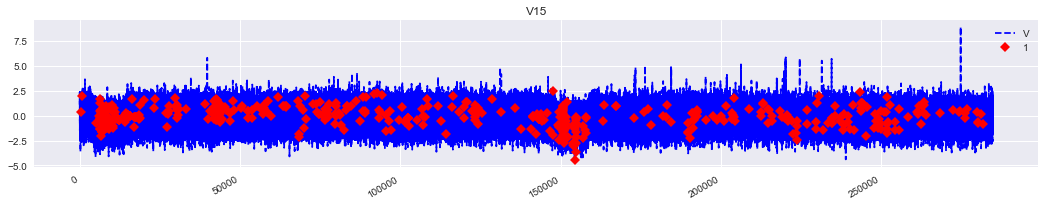

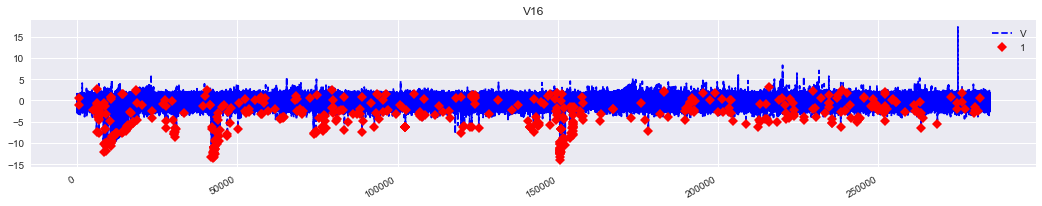

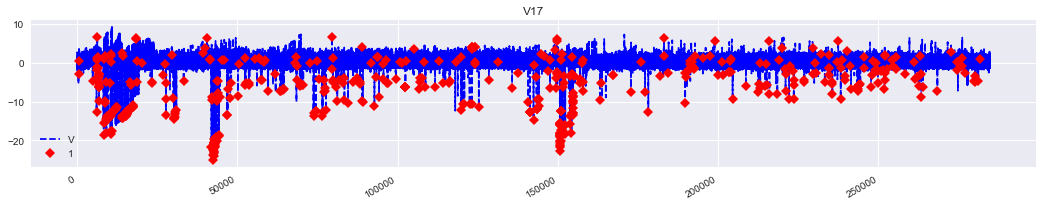

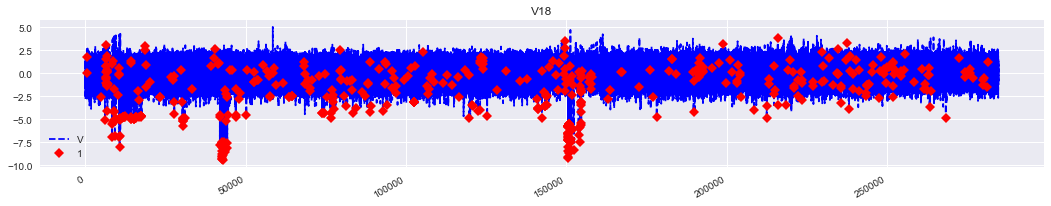

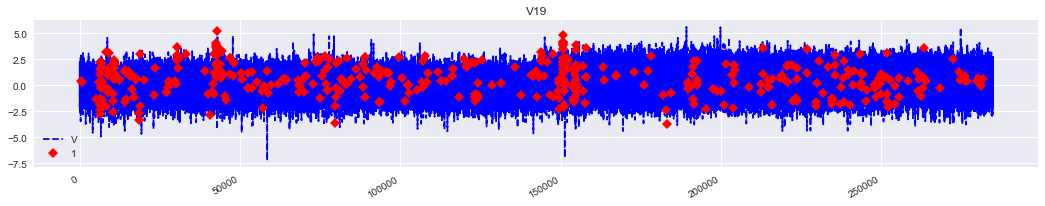

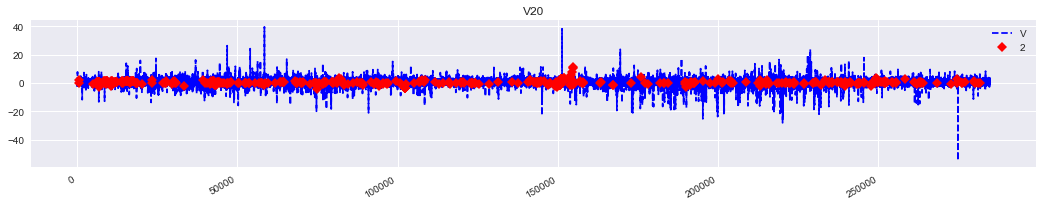

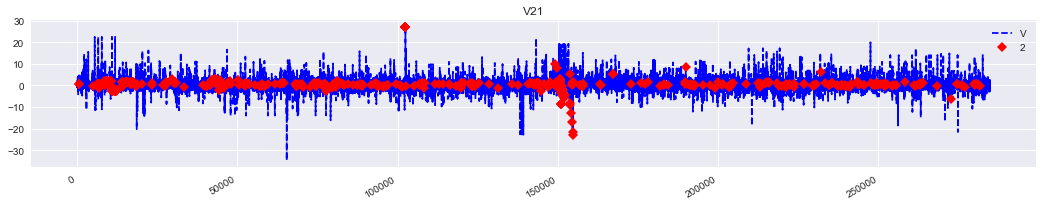

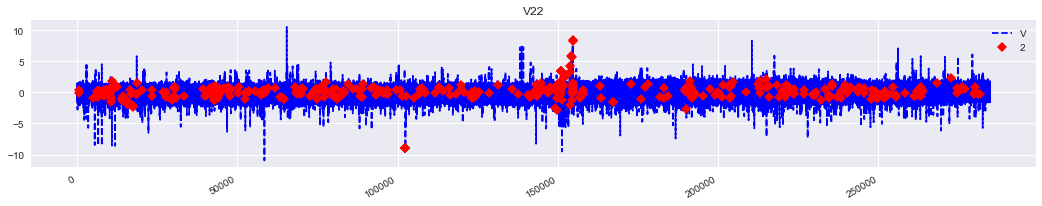

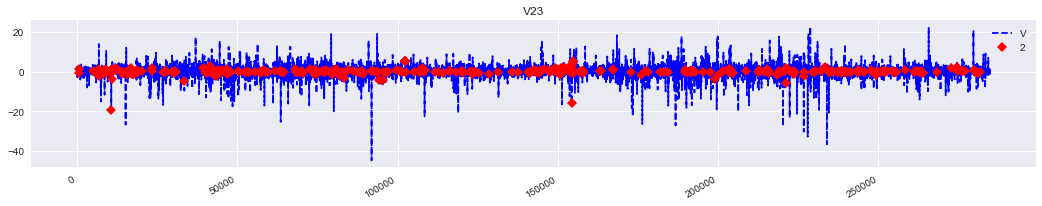

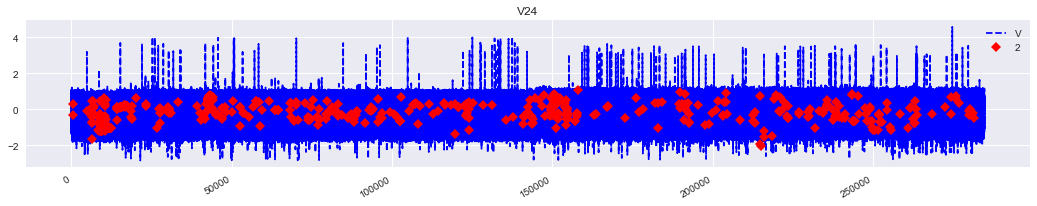

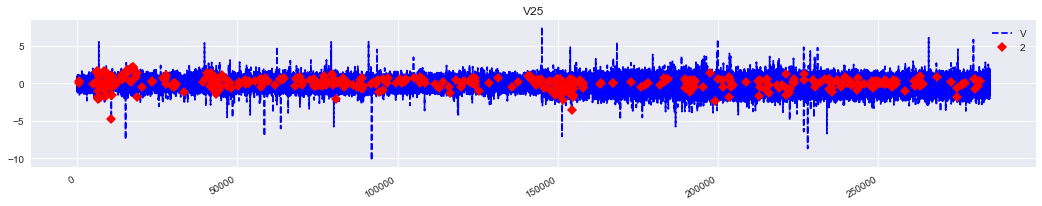

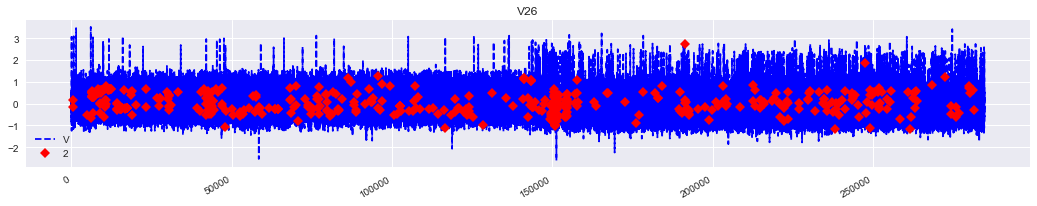

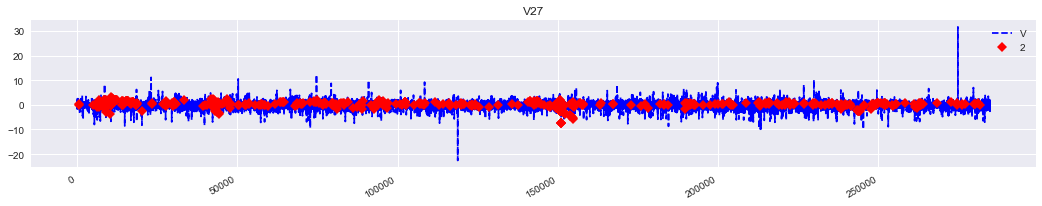

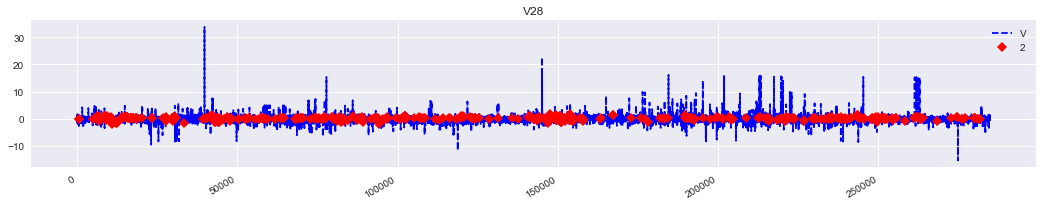

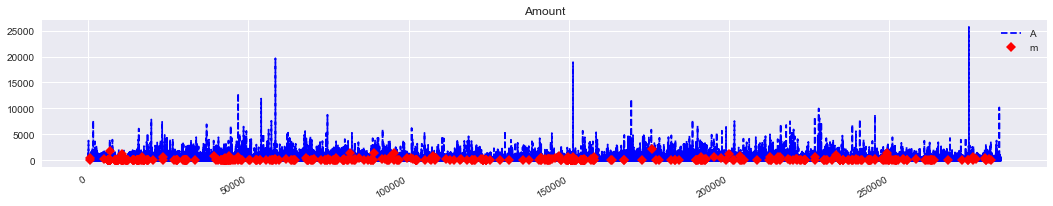

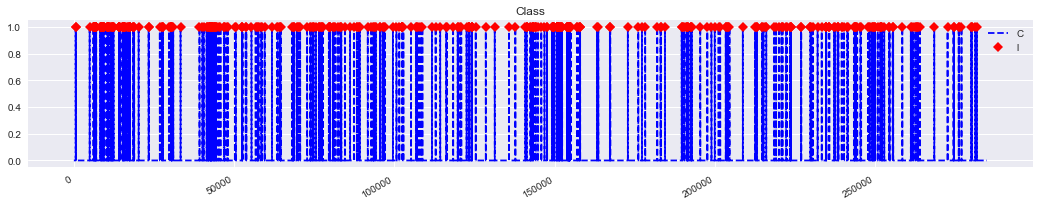

In [7]:
anomalies = df[df["Class"]==1]
columns=df.columns
for col in columns:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df[col], color='blue',linestyle='--', zorder=1)
    plt.plot(anomalies[col], linestyle='none', marker='D', color='red',zorder=2)
    plt.gcf().autofmt_xdate()
    plt.title(col)
    plt.legend(col)
    plt.show()

In [8]:
def count_anomaly(df):
    anomalies = df[df["Class"]==1]
    no_anomalies = df[df["Class"]==0]
    return anomalies.shape[0], no_anomalies.shape[0]

In [9]:
anomalies, no_anomalies = count_anomaly(df)

In [10]:
print("number of samples :", anomalies)
print("number of anomalies : ", no_anomalies)

number of samples : 492
number of anomalies :  284315


In [11]:
con_rate = anomalies/(no_anomalies + anomalies)
con_rate

0.001727485630620034

In [12]:
def get_hour_rate(df, hours):
    _ = df[df["Time"]>3600*hours]
    _ = _[_["Time"]<3600*(hours+1)]
    anomalies = _[_["Class"]==1]
    con_rate = anomalies.shape[0]/_.shape[0]
    return con_rate

In [13]:
rate = []
for i in range(48):
    rate.append(get_hour_rate(df, i))

# Rate of anomaly contamination

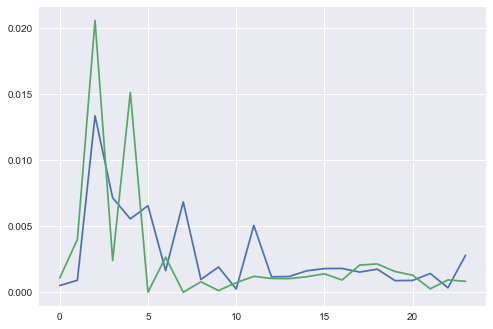

In [14]:
plt.plot(rate[:24])
plt.plot(rate[24:48])

In [16]:
def get_hour_anomaly(df, hours):
    _ = df[df["Time"]>3600*hours]
    _ = _[_["Time"]<3600*(hours+1)]
    anomalies = _[_["Class"]==1]
    return anomalies.shape[0]

In [17]:
anomaly = []
for i in range(48):
    anomaly.append(get_hour_anomaly(df, i))

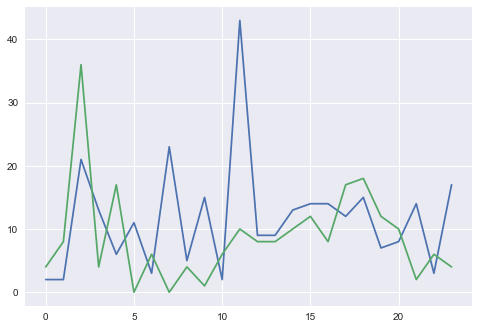

In [18]:
plt.plot(anomaly[:24])
plt.plot(anomaly[24:48])